# Graduate Admission Prediction using Multiple Regression

### Based on:
- GPA (Out of 10)
- GRE (Out of 340)
- TOEFL (Out of 120)
- Letter of Recommendation (Out of 5)
- Research Work (0 or 1)
- Statement of purpose
- University Rating (Out of 5)


## Import Libraries and Dataset

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [248]:
admission_data = pd.read_csv("Admission_Predict.csv")
#admission_data = admission_data.iloc[:,1:]
admission_data.drop("Serial No.", axis = 1, inplace = True)
admission_data


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Perform Exploratory Data Analysis

In [249]:
#To check null values
admission_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [250]:
#To check dataframe information
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [251]:
#Statistical Summary of the dataframe
admission_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [252]:
df_university = admission_data.groupby(by = "University Rating").mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


## Perform Data Visualisation



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B57AF0B08>,
      dtype=object)

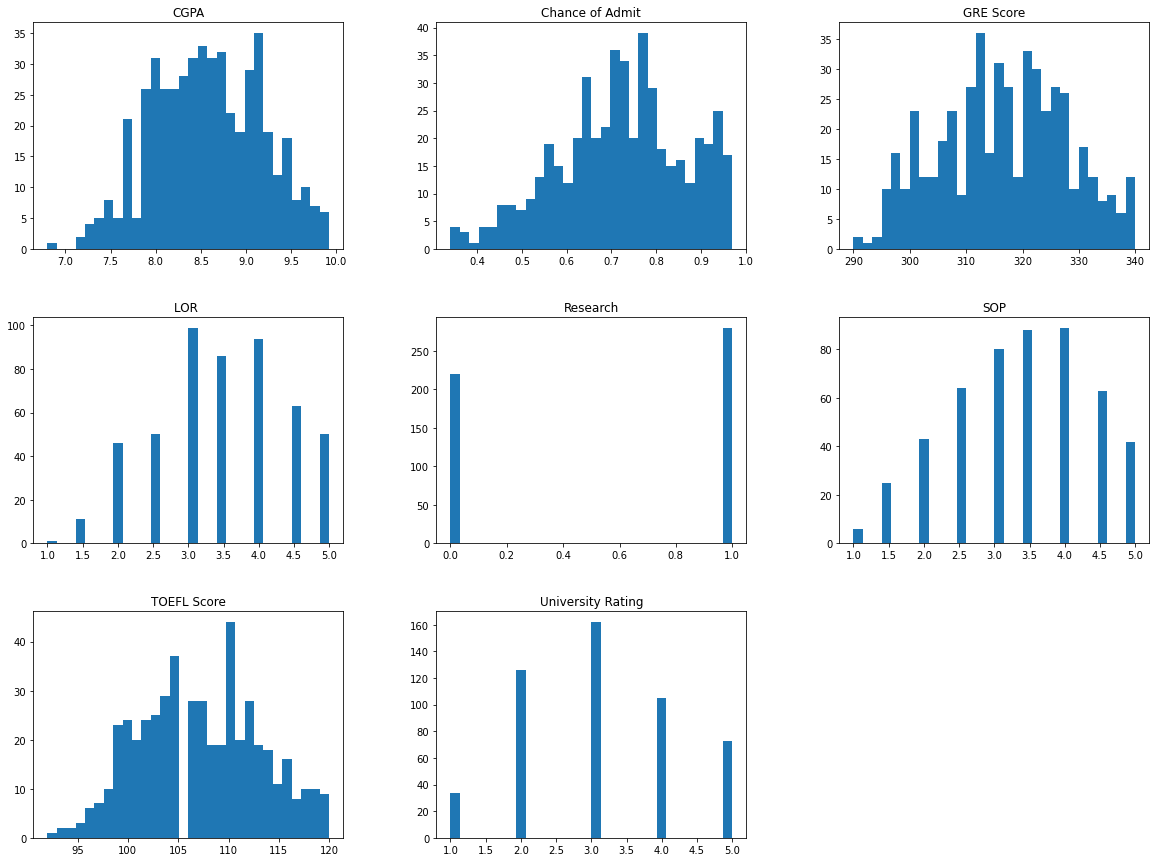

In [253]:
admission_data.hist(bins = 30, figsize = (20,15), grid = False)

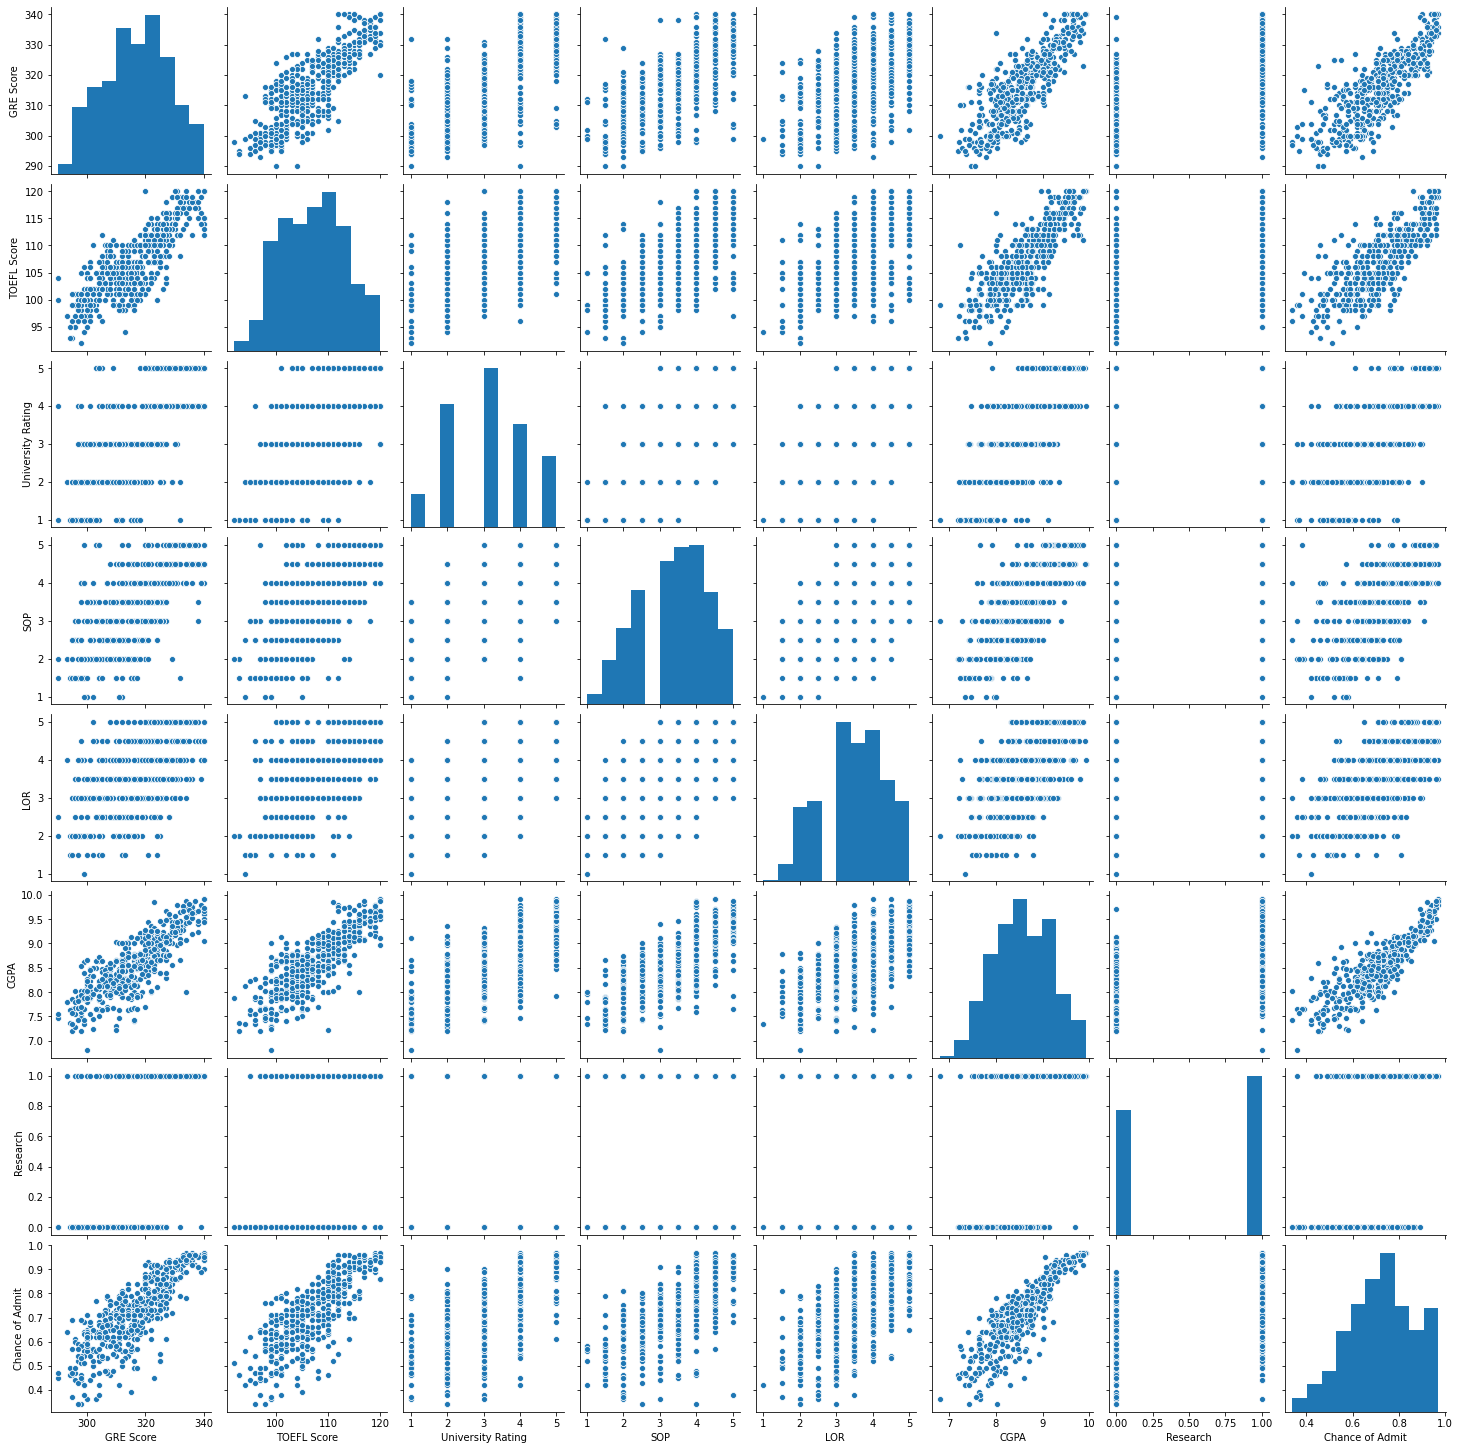

In [254]:
sns.pairplot(admission_data)

In [255]:
#For Correlations
cor = admission_data.corr()
cor

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


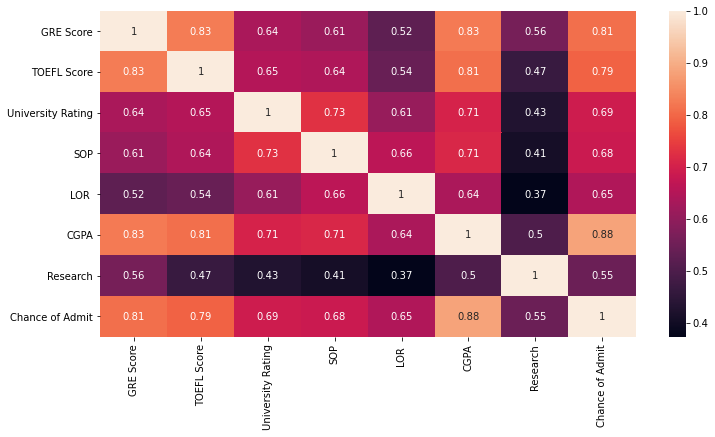

In [256]:
#For heat map
plt.figure(figsize = (12,6))
sns.heatmap(cor, annot = True)
plt.show()

## Create Training and Testing Dataset

In [257]:
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [258]:
#x = admission_data.iloc[ : , 0:7]
#Creating Feature dataset
x = admission_data.drop(columns = "Chance of Admit")
print(x.columns)
print('Shape :', x.shape)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
Shape : (500, 7)


In [259]:
#y = admission_data.iloc[:, -1]
#Creating Label dataset
y = admission_data['Chance of Admit']
y.shape

(500,)

In [312]:
#Converting df to np array
x = np.array(x)
y = np.array(y)


In [313]:
y = y.reshape(-1,1)
#y = y.reshape(500, 1 )
y.shape

(500, 1)

In [262]:
#scaling the data before training the model
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

#For Feature
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

#For Label
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [263]:
#Splitting the data into test and train sets
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 2, shuffle = True)
y_train.shape

(425, 1)

## Train and Evaluate a Linear Regression Model

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

#Training of Linear Regression
LinearRegression_model = LinearRegression().fit(x_train, y_train)
LinearRegression_model

LinearRegression()

In [265]:
#Accuracy of the model 
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.7966076762674222

In [266]:
#Theta or weights of the model
LinearRegression_model.intercept_

array([0.00453687])

In [267]:
LinearRegression_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Train and Evaluate Neural Networks

In [268]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras.optimizers import Adam

In [269]:
model = keras.Sequential()
model.add(Dense (50, input_dim = 7))
model.add(Activation('relu'))

model.add(Dense (150))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense (150))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense (50))
model.add(Activation('linear'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'Adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_40 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_41 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_42 (Activation)   (None, 150)             

In [270]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [271]:
epoch_his = model.fit(x_train, y_train, epochs = 100, verbose = 0)

In [272]:
#Accuracy of the model
result = model.evaluate(x_test, y_test)
accuracy = 1 - result
model.add(Dense(7))
print("Accuracy : {}".format(accuracy))

75/75 [==============================] - 0s 4ms/sample - loss: 0.2352
Accuracy : 0.7648391536871593


In [273]:
epoch_his.history.keys()

dict_keys(['loss'])

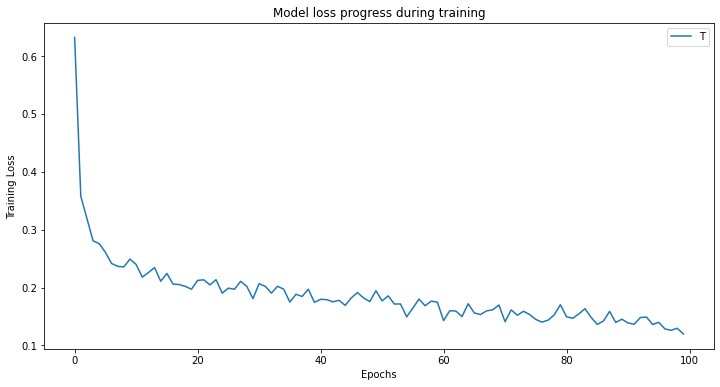

In [274]:
plt.figure(figsize = (12,6))
plt.plot(epoch_his.history['loss'])
plt.title("Model loss progress during training")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend("Training Loss")


## Train and evaluate a decision tree and random forest models

### Decision Tree

In [275]:
#from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)
DecisionTree_model

DecisionTreeRegressor()

In [276]:
accuracy_DecisionTree =  DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.6406263153464097

### Random Forest Model

In [277]:
#from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=3)
RandomForest_model.fit(x_train, y_train)
RandomForest_model

C:\Users\jainy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=3)

In [278]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_RandomForest

0.775302516636543

## Calculate Regression Model KPIs (Key Performance Indicator)

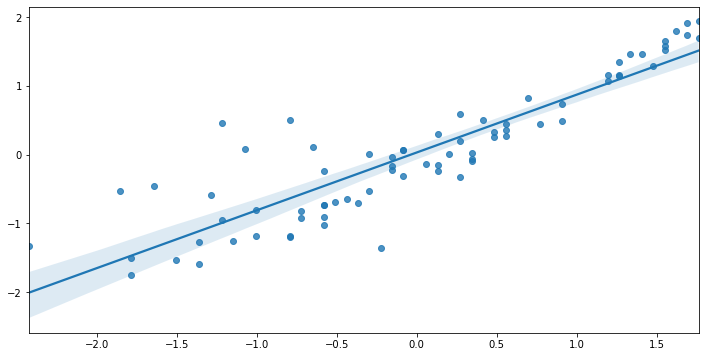

In [279]:
plt.figure(figsize = (12,6))
y_predict = LinearRegression_model.predict(x_test)
sns.regplot(y_test, y_predict)

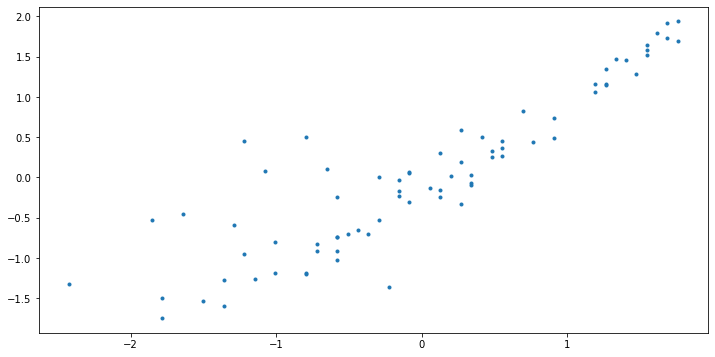

In [280]:
plt.figure(figsize = (12,6))
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '.')

In [281]:
#Inverse Transform to get the original values
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

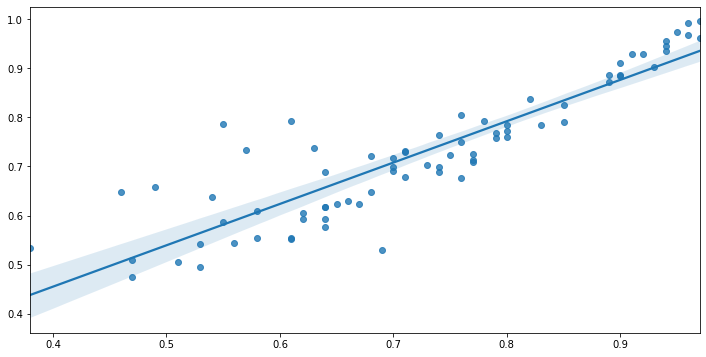

In [282]:
plt.figure(figsize = (12,6))
y_predict = LinearRegression_model.predict(x_test)
sns.regplot(y_test_orig, y_predict_orig)

In [295]:
len_col = x_test.shape[1]
len_row = x_test.shape[0]
print(len_col, len_row)

7 75


In [303]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1 - r2)*(len_row - 1)/(len_row - len_col - 1) 

print("RMSE : ", RMSE, "\nMSE : ", MSE, "\nMAE : ", MAE, "\nR2 : ", r2, "\nAdjusted Return : ", adj_r2)

RMSE :  0.066 
MSE :  0.004295284290878743 
MAE :  0.04416988965533127 
R2 :  0.7966076762674221 
Adjusted Return :  0.7753577319968543
